In [27]:

library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)
library(viridis)
library(ggvenn)
library(gridExtra)

In [2]:
MyExpression<- import(file = "~/Dropbox/Potato/RNA-seq_2/RNAseq_analysis/Data/DEseq/combined_files_for_PCA/within_species/atl_diel_outfile.csv", sep =',', header = TRUE, fill = TRUE )

In [3]:
MyExpression[78,]

,V1,Leaf_7am_start_R1_NCA_AA_shd,Leaf_7am_start_R2_NCA_AB_shd,Leaf_7am_start_R3_NCA_AC_shd,Leaf_9am_R1_NCA_AG_shd,Leaf_9am_R2_NCA_AH_shd,Leaf_9am_R3_NCA_AI_shd,Leaf_11am_R1_NCA_AM_shd,Leaf_11am_R2_NCA_AN_shd,Leaf_11am_R3_NCA_AO_shd,⋯,Leaf_1AM_10_27_22_R3_NCA_EF_lgd,Leaf_3AM_10_27_22_R1_NCA_EG_lgd,Leaf_3AM_10_27_22_R2_NCA_EH_lgd,Leaf_3AM_10_27_22_R3_NCA_EI_lgd,Leaf_5AM_10_27_22_R1_NCA_EJ_lgd,Leaf_5AM_10_27_22_R2_NCA_EK_lgd,Leaf_5AM_10_27_22_R3_NCA_EL_lgd,Leaf_7AM_10_27_22_R1_NCA_EM_lgd,Leaf_7AM_10_27_22_R2_NCA_EN_lgd,Leaf_7AM_10_27_22_R3_NCA_EO_lgd
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
78,Soltu.Atl_v3.11_4G001350.2,-0.9211788,-0.9841938,-1.07588,-0.8252554,-1.0806,-0.9815022,-1.100987,-0.9471447,-1.109453,⋯,-1.189867,-1.261425,-1.235361,-1.275535,-1.267996,-1.274418,-1.25783,-1.24875,-1.206926,1.024137


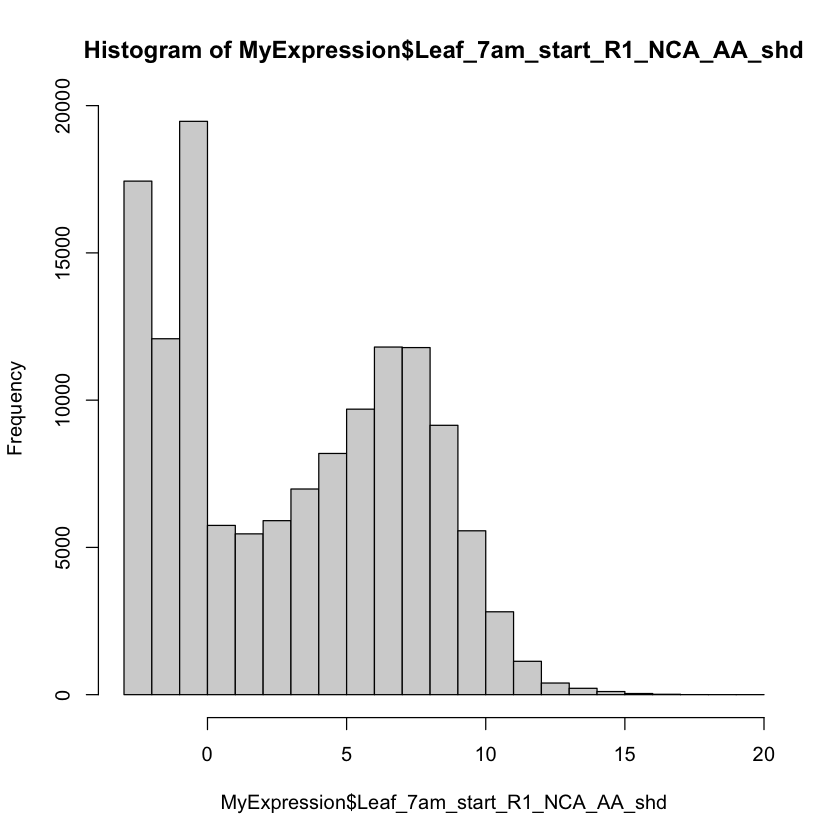

In [4]:
hist(MyExpression$Leaf_7am_start_R1_NCA_AA_shd)

In [5]:
colnames(MyExpression)[1] <- "geneID"

In [6]:
colnames(MyExpression)

[1] "geneID"                           "Leaf_7am_start_R1_NCA_AA_shd"    
  [3] "Leaf_7am_start_R2_NCA_AB_shd"     "Leaf_7am_start_R3_NCA_AC_shd"    
  [5] "Leaf_9am_R1_NCA_AG_shd"           "Leaf_9am_R2_NCA_AH_shd"          
  [7] "Leaf_9am_R3_NCA_AI_shd"           "Leaf_11am_R1_NCA_AM_shd"         
  [9] "Leaf_11am_R2_NCA_AN_shd"          "Leaf_11am_R3_NCA_AO_shd"         
 [11] "Leaf_1pm_R1_NCA_AS_shd"           "Leaf_1pm_R2_NCA_AT_shd"          
 [13] "Leaf_1pm_R3_NCA_AU_shd"           "Leaf_3pm_R1_NCA_AY_shd"          
 [15] "Leaf_3pm_R3_NCA_BA_shd"           "Leaf_5pm_R1_NCA_BE_shd"          
 [17] "Leaf_5pm_R2_NCA_BF_shd"           "Leaf_5pm_R3_NCA_BG_shd"          
 [19] "Leaf_7pm_R1_NCA_BK_shd"           "Leaf_7pm_R2_NCA_BL_shd"          
 [21] "Leaf_7pm_R3_NCA_BM_shd"           "Leaf_9pm_R1_NCA_BQ_shd"          
 [23] "Leaf_9pm_R2_NCA_BR_shd"           "Leaf_9pm_R3_NCA_BS_shd"          
 [25] "Leaf_11pm_R1_NCA_BW_shd"          "Leaf_11pm_R2_NCA_BX_shd"         
 [27] "Leaf_11pm_R3_NCA_BY_shd"          "Leaf_1am_R1_NCA_CC_shd"          
 [29] "Leaf_1am_R2_NCA_CD_shd"           "Leaf_1am_R3_NCA_CE_shd"          
 [31] "Leaf_1am_R4_NCA_CF_shd"           "Leaf_3am_R1_NCA_CK_shd"          
 [33] "Leaf_3am_R2_NCA_CL_shd"           "Leaf_3am_R3_NCA_CM_shd"          
 [35] "Leaf_5am_R1_NCA_CQ_shd"           "Leaf_5am_R2_NCA_CR_shd"          
 [37] "Leaf_5am_R3_NCA_CS_shd"           "Leaf_7am_end_R1_NCA_CW_shd"      
 [39] "Leaf_7am_end_R2_NCA_CX_shd"       "Leaf_7am_end_R3_NCA_CY_shd"      
 [41] "Tuber_7am_start_R2_NCA_AE_shd"    "Tuber_7am_start_R3_NCA_AF_shd"   
 [43] "Tuber_9am_R1_NCA_AJ_shd"          "Tuber_9am_R2_NCA_AK_shd"         
 [45] "Tuber_9am_R3_NCA_AL_shd"          "Tuber_11am_R1_NCA_AP_shd"        
 [47] "Tuber_11am_R2_NCA_AQ_shd"         "Tuber_11am_R3_NCA_AR_shd"        
 [49] "Tuber_1pm_R1_NCA_AV_shd"          "Tuber_1pm_R2_NCA_AW_shd"         
 [51] "Tuber_1pm_R3_NCA_AX_shd"          "Tuber_3pm_R1_NCA_BB_shd"         
 [53] "Tuber_3pm_R2_NCA_BC_shd"          "Tuber_3pm_R3_NCA_BD_shd"         
 [55] "Tuber_5pm_R1_NCA_BH_shd"          "Tuber_5pm_R2_NCA_BI_shd"         
 [57] "Tuber_5pm_R3_NCA_BJ_shd"          "Tuber_7pm_R1_NCA_BN_shd"         
 [59] "Tuber_7pm_R2_NCA_BO_shd"          "Tuber_7pm_R3_NCA_BP_shd"         
 [61] "Tuber_9pm_R2_NCA_BU_shd"          "Tuber_9pm_R3_NCA_BV_shd"         
 [63] "Tuber_11pm_R1_NCA_BZ_shd"         "Tuber_11pm_R2_NCA_CA_shd"        
 [65] "Tuber_11pm_R3_NCA_CB_shd"         "Tuber_1am_R1_NCA_CG_shd"         
 [67] "Tuber_1am_R2_NCA_CH_shd"          "Tuber_1am_R3_NCA_CI_shd"         
 [69] "Tuber_1am_R4_NCA_CJ_shd"          "Tuber_3am_R1_NCA_CN_shd"         
 [71] "Tuber_3am_R2_NCA_CO_shd"          "Tuber_3am_R3_NCA_CP_shd"         
 [73] "Tuber_5am_R1_NCA_CT_shd"          "Tuber_5am_R2_NCA_CU_shd"         
 [75] "Tuber_5am_R3_NCA_CV_shd"          "Tuber_7am_end_R1_NCA_CZ_shd"     
 [77] "Tuber_7am_end_R2_NCA_DA_shd"      "Tuber_7am_end_R3_NCA_DB_shd"     
 [79] "Leaf_7AM_10_26_22_R1_NCA_DC_lgd"  "Leaf_7AM_10_26_22_R2_NCA_DD_lgd" 
 [81] "Leaf_7AM_10_26_22_R3_NCA_DE_lgd"  "Leaf_9AM_10_26_22_R1_NCA_DF_lgd" 
 [83] "Leaf_9AM_10_26_22_R2_NCA_DG_lgd"  "Leaf_9AM_10_26_22_R3_NCA_DH_lgd" 
 [85] "Leaf_11AM_10_26_22_R1_NCA_DI_lgd" "Leaf_11AM_10_26_22_R2_NCA_DJ_lgd"
 [87] "Leaf_11AM_10_26_22_R3_NCA_DK_lgd" "Leaf_1PM_10_26_22_R1_NCA_DL_lgd" 
 [89] "Leaf_1PM_10_26_22_R2_NCA_DM_lgd"  "Leaf_1PM_10_26_22_R3_NCA_DN_lgd" 
 [91] "Leaf_3PM_10_26_22_R1_NCA_DO_lgd"  "Leaf_3PM_10_26_22_R2_NCA_DP_lgd" 
 [93] "Leaf_3PM_10_26_22_R3_NCA_DQ_lgd"  "Leaf_5PM_10_26_22_R1_NCA_DR_lgd" 
 [95] "Leaf_5PM_10_26_22_R2_NCA_DS_lgd"  "Leaf_5PM_10_26_22_R3_NCA_DT_lgd" 
 [97] "Leaf_7PM_10_26_22_R1_NCA_DU_lgd"  "Leaf_7PM_10_26_22_R2_NCA_DV_lgd" 
 [99] "Leaf_7PM_10_26_22_R3_NCA_DW_lgd"  "Leaf_9PM_10_26_22_R1_NCA_DX_lgd" 
[101] "Leaf_9PM_10_26_22_R2_NCA_DY_lgd"  "Leaf_9PM_10_26_22_R3_NCA_DZ_lgd" 
[103] "Leaf_11PM_10_26_22_R1_NCA_EA_lgd" "Leaf_11PM_10_26_22_R2_NCA_EB_lgd"
[105] "Leaf_11PM_10_26_22_R3_NCA_EC_lgd" "Leaf_1AM

### Modifications to pivot longer
Change time to ZT, taking into account the issue with the 7AM and 9AM time points\
Change time + date to ZT

In [7]:


names(MyExpression) <- sub("7AM_start_", "ZT0_", names(MyExpression))
names(MyExpression) <- sub("7AM_end_", "ZT24_", names(MyExpression))
names(MyExpression) <- sub("7am_start_", "ZT0_", names(MyExpression))
names(MyExpression) <- sub("7am_end_", "ZT24_", names(MyExpression))
names(MyExpression) <- sub("7AM_10_26_22_", "ZT0_", names(MyExpression))
names(MyExpression) <- sub("7AM_10_27_22_", "ZT24_", names(MyExpression))
names(MyExpression) <- sub("7AM_9_14_22_", "ZT0_", names(MyExpression))
names(MyExpression) <- sub("7AM_9_15_22_", "ZT24_", names(MyExpression))
names(MyExpression) <- sub("7AM_8_2_22_", "ZT0_", names(MyExpression))
names(MyExpression) <- sub("7AM_8_3_22_", "ZT24_", names(MyExpression))
names(MyExpression) <- sub("7PM_12_16_20_", "ZT12_", names(MyExpression))
names(MyExpression) <- sub("9PM_12_16_20_", "ZT14_", names(MyExpression))
names(MyExpression) <- sub("11PM_12_16_20_", "ZT16_", names(MyExpression))
names(MyExpression) <- sub("_1AM_12_17_20_", "_ZT18_", names(MyExpression))
names(MyExpression) <- sub("3AM_12_17_20_", "ZT20_", names(MyExpression))
names(MyExpression) <- sub("5AM_12_17_20_", "ZT22_", names(MyExpression))
names(MyExpression) <- sub("7AM_12_17_20_", "ZT24_", names(MyExpression))
names(MyExpression) <- sub("9AM_12_17_20_", "ZT26_", names(MyExpression))
names(MyExpression) <- sub("11AM_12_17_20_", "ZT28_", names(MyExpression))
names(MyExpression) <- sub("_1PM_12_17_20_", "_ZT30_", names(MyExpression))
names(MyExpression) <- sub("3PM_12_17_20_", "ZT32_", names(MyExpression))
names(MyExpression) <- sub("5PM_12_17_20_", "ZT34_", names(MyExpression))
names(MyExpression) <- sub("7PM_12_17_20_", "ZT36_", names(MyExpression))
names(MyExpression) <- sub("9PM_12_17_20_", "ZT38_", names(MyExpression))
names(MyExpression) <- sub("11PM_12_17_20_", "ZT40_", names(MyExpression))
names(MyExpression) <- sub("_1AM_12_18_20_", "_ZT42_", names(MyExpression))
names(MyExpression) <- sub("3AM_12_18_20_", "ZT44_", names(MyExpression))
names(MyExpression) <- sub("5AM_12_18_20_", "ZT46_", names(MyExpression))
names(MyExpression) <- sub("7AM_12_18_20_", "ZT48_", names(MyExpression))
names(MyExpression) <- sub("9AM_12_18_20_", "ZT50_", names(MyExpression))
names(MyExpression) <- sub("11AM_12_18_20_", "ZT52_", names(MyExpression))
names(MyExpression) <- sub("_1PM_12_18_20_", "_ZT54_", names(MyExpression))
names(MyExpression) <- sub("3PM_12_18_20_", "ZT56_", names(MyExpression))
names(MyExpression) <- sub("5PM_12_18_20_", "ZT58_", names(MyExpression))
names(MyExpression) <- sub("7PM_12_18_20_", "ZT60_", names(MyExpression))
names(MyExpression) <- sub("7AM_10_26_22_", "ZT0_", names(MyExpression))
names(MyExpression) <- sub("9AM_10_26_22_", "ZT2_", names(MyExpression))
names(MyExpression) <- sub("11AM_10_26_22_", "ZT4_", names(MyExpression))
names(MyExpression) <- sub("_1PM_10_26_22_", "_ZT6_", names(MyExpression))
names(MyExpression) <- sub("3PM_10_26_22_", "ZT8_", names(MyExpression))
names(MyExpression) <- sub("5PM_10_26_22_", "ZT10_", names(MyExpression))
names(MyExpression) <- sub("7PM_10_26_22_", "ZT12_", names(MyExpression))
names(MyExpression) <- sub("9PM_10_26_22_", "ZT14_", names(MyExpression))
names(MyExpression) <- sub("11PM_10_26_22_", "ZT16_", names(MyExpression))
names(MyExpression) <- sub("_1AM_10_27_22_", "_ZT18_", names(MyExpression))
names(MyExpression) <- sub("3AM_10_27_22_", "ZT20_", names(MyExpression))
names(MyExpression) <- sub("5AM_10_27_22_", "ZT22_", names(MyExpression))
names(MyExpression) <- sub("7AM_10_27_22_", "ZT24_", names(MyExpression))








In [8]:
colnames(MyExpression)

[1] "geneID"                   "Leaf_ZT0_R1_NCA_AA_shd"  
  [3] "Leaf_ZT0_R2_NCA_AB_shd"   "Leaf_ZT0_R3_NCA_AC_shd"  
  [5] "Leaf_9am_R1_NCA_AG_shd"   "Leaf_9am_R2_NCA_AH_shd"  
  [7] "Leaf_9am_R3_NCA_AI_shd"   "Leaf_11am_R1_NCA_AM_shd" 
  [9] "Leaf_11am_R2_NCA_AN_shd"  "Leaf_11am_R3_NCA_AO_shd" 
 [11] "Leaf_1pm_R1_NCA_AS_shd"   "Leaf_1pm_R2_NCA_AT_shd"  
 [13] "Leaf_1pm_R3_NCA_AU_shd"   "Leaf_3pm_R1_NCA_AY_shd"  
 [15] "Leaf_3pm_R3_NCA_BA_shd"   "Leaf_5pm_R1_NCA_BE_shd"  
 [17] "Leaf_5pm_R2_NCA_BF_shd"   "Leaf_5pm_R3_NCA_BG_shd"  
 [19] "Leaf_7pm_R1_NCA_BK_shd"   "Leaf_7pm_R2_NCA_BL_shd"  
 [21] "Leaf_7pm_R3_NCA_BM_shd"   "Leaf_9pm_R1_NCA_BQ_shd"  
 [23] "Leaf_9pm_R2_NCA_BR_shd"   "Leaf_9pm_R3_NCA_BS_shd"  
 [25] "Leaf_11pm_R1_NCA_BW_shd"  "Leaf_11pm_R2_NCA_BX_shd" 
 [27] "Leaf_11pm_R3_NCA_BY_shd"  "Leaf_1am_R1_NCA_CC_shd"  
 [29] "Leaf_1am_R2_NCA_CD_shd"   "Leaf_1am_R3_NCA_CE_shd"  
 [31] "Leaf_1am_R4_NCA_CF_shd"   "Leaf_3am_R1_NCA_CK_shd"  
 [33] "Leaf_3am_R2_NCA_CL_shd"   "Leaf_3am_R3_NCA_CM_shd"  
 [35] "Leaf_5am_R1_NCA_CQ_shd"   "Leaf_5am_R2_NCA_CR_shd"  
 [37] "Leaf_5am_R3_NCA_CS_shd"   "Leaf_ZT24_R1_NCA_CW_shd" 
 [39] "Leaf_ZT24_R2_NCA_CX_shd"  "Leaf_ZT24_R3_NCA_CY_shd" 
 [41] "Tuber_ZT0_R2_NCA_AE_shd"  "Tuber_ZT0_R3_NCA_AF_shd" 
 [43] "Tuber_9am_R1_NCA_AJ_shd"  "Tuber_9am_R2_NCA_AK_shd" 
 [45] "Tuber_9am_R3_NCA_AL_shd"  "Tuber_11am_R1_NCA_AP_shd"
 [47] "Tuber_11am_R2_NCA_AQ_shd" "Tuber_11am_R3_NCA_AR_shd"
 [49] "Tuber_1pm_R1_NCA_AV_shd"  "Tuber_1pm_R2_NCA_AW_shd" 
 [51] "Tuber_1pm_R3_NCA_AX_shd"  "Tuber_3pm_R1_NCA_BB_shd" 
 [53] "Tuber_3pm_R2_NCA_BC_shd"  "Tuber_3pm_R3_NCA_BD_shd" 
 [55] "Tuber_5pm_R1_NCA_BH_shd"  "Tuber_5pm_R2_NCA_BI_shd" 
 [57] "Tuber_5pm_R3_NCA_BJ_shd"  "Tuber_7pm_R1_NCA_BN_shd" 
 [59] "Tuber_7pm_R2_NCA_BO_shd"  "Tuber_7pm_R3_NCA_BP_shd" 
 [61] "Tuber_9pm_R2_NCA_BU_shd"  "Tuber_9pm_R3_NCA_BV_shd" 
 [63] "Tuber_11pm_R1_NCA_BZ_shd" "Tuber_11pm_R2_NCA_CA_shd"
 [65] "Tuber_11pm_R3_NCA_CB_shd" "Tuber_1am_R1_NCA_CG_shd" 
 [67] "Tuber_1am_R2_NCA_CH_shd"  "Tuber_1am_R3_NCA_CI_shd" 
 [69] "Tuber_1am_R4_NCA_CJ_shd"  "Tuber_3am_R1_NCA_CN_shd" 
 [71] "Tuber_3am_R2_NCA_CO_shd"  "Tuber_3am_R3_NCA_CP_shd" 
 [73] "Tuber_5am_R1_NCA_CT_shd"  "Tuber_5am_R2_NCA_CU_shd" 
 [75] "Tuber_5am_R3_NCA_CV_shd"  "Tuber_ZT24_R1_NCA_CZ_shd"
 [77] "Tuber_ZT24_R2_NCA_DA_shd" "Tuber_ZT24_R3_NCA_DB_shd"
 [79] "Leaf_ZT0_R1_NCA_DC_lgd"   "Leaf_ZT0_R2_NCA_DD_lgd"  
 [81] "Leaf_ZT0_R3_NCA_DE_lgd"   "Leaf_ZT2_R1_NCA_DF_lgd"  
 [83] "Leaf_ZT2_R2_NCA_DG_lgd"   "Leaf_ZT2_R3_NCA_DH_lgd"  
 [85] "Leaf_ZT4_R1_NCA_DI_lgd"   "Leaf_ZT4_R2_NCA_DJ_lgd"  
 [87] "Leaf_ZT4_R3_NCA_DK_lgd"   "Leaf_ZT6_R1_NCA_DL_lgd"  
 [89] "Leaf_ZT6_R2_NCA_DM_lgd"   "Leaf_ZT6_R3_NCA_DN_lgd"  
 [91] "Leaf_ZT8_R1_NCA_DO_lgd"   "Leaf_ZT8_R2_NCA_DP_lgd"  
 [93] "Leaf_ZT8_R3_NCA_DQ_lgd"   "Leaf_ZT10_R1_NCA_DR_lgd" 
 [95] "Leaf_ZT10_R2_NCA_DS_lgd"  "Leaf_ZT10_R3_NCA_DT_lgd" 
 [97] "Leaf_ZT12_R1_NCA_DU_lgd"  "Leaf_ZT12_R2_NCA_DV_lgd" 
 [99] "Leaf_ZT12_R3_NCA_DW_lgd"  "Leaf_ZT14_R1_NCA_DX_lgd" 
[101] "Leaf_ZT14_R2_NCA_DY_lgd"  "Leaf_ZT14_R3_NCA_DZ_lgd" 
[103] "Leaf_ZT16_R1_NCA_EA_lgd"  "Leaf_ZT16_R2_NCA_EB_lgd" 
[105] "Leaf_ZT16_R3_NCA_EC_lgd"  "Leaf_ZT18_R1_NCA_ED_lgd" 
[107] "Leaf_ZT18_R2_NCA_EE_lgd"  "Leaf_ZT18_R3_NCA_EF_lgd" 
[109] "Leaf_ZT20_R1_NCA_EG_lgd"  "Leaf_ZT20_R2_NCA_EH_lgd" 
[111] "Leaf_ZT20_R3_NCA_EI_lgd"  "Leaf_ZT22_R1_NCA_EJ_lgd" 
[113] "Leaf_ZT22_R2_NCA_EK_lgd"  "Leaf_ZT22_R3_NCA_EL_lgd" 
[115] "Leaf_ZT24_R1_NCA_EM_lgd"  "Leaf_ZT24_R2_NCA_EN_lgd" 
[117] "Leaf_ZT24_R3_NCA_EO_lgd"

In [9]:
names(MyExpression) <- sub("_9am_", "_ZT2_", names(MyExpression))
names(MyExpression) <- sub("_9AM_", "_ZT2_", names(MyExpression))
names(MyExpression) <- sub("_11am_", "_ZT4_", names(MyExpression))
names(MyExpression) <- sub("_11AM_", "_ZT4_", names(MyExpression))
names(MyExpression) <- sub("_1pm_", "_ZT6_", names(MyExpression))
names(MyExpression) <- sub("_1PM_", "_ZT6_", names(MyExpression))
names(MyExpression) <- sub("_3pm_", "_ZT8_", names(MyExpression))
names(MyExpression) <- sub("_3PM_", "_ZT8_", names(MyExpression))
names(MyExpression) <- sub("_5pm_", "_ZT10_", names(MyExpression))
names(MyExpression) <- sub("_5PM_", "_ZT10_", names(MyExpression))
names(MyExpression) <- sub("_7pm_", "_ZT12_", names(MyExpression))
names(MyExpression) <- sub("_7PM_", "_ZT12_", names(MyExpression))
names(MyExpression) <- sub("_9pm_", "_ZT14_", names(MyExpression))
names(MyExpression) <- sub("_9PM_", "_ZT14_", names(MyExpression))
names(MyExpression) <- sub("_11pm_", "_ZT16_", names(MyExpression))
names(MyExpression) <- sub("_11PM_", "_ZT16_", names(MyExpression))
names(MyExpression) <- sub("_1am_", "_ZT18_", names(MyExpression))
names(MyExpression) <- sub("_1AM_", "_ZT18_", names(MyExpression))
names(MyExpression) <- sub("_3am_", "_ZT20_", names(MyExpression))
names(MyExpression) <- sub("_3AM_", "_ZT20_", names(MyExpression))
names(MyExpression) <- sub("_5am_", "_ZT22_", names(MyExpression))
names(MyExpression) <- sub("_5AM_", "_ZT22_", names(MyExpression))
names(MyExpression) <- sub("_7am_", "_ZT24_", names(MyExpression))
names(MyExpression) <- sub("_7AM_", "_ZT24_", names(MyExpression))

In [10]:
colnames(MyExpression)

[1] "geneID"                   "Leaf_ZT0_R1_NCA_AA_shd"  
  [3] "Leaf_ZT0_R2_NCA_AB_shd"   "Leaf_ZT0_R3_NCA_AC_shd"  
  [5] "Leaf_ZT2_R1_NCA_AG_shd"   "Leaf_ZT2_R2_NCA_AH_shd"  
  [7] "Leaf_ZT2_R3_NCA_AI_shd"   "Leaf_ZT4_R1_NCA_AM_shd"  
  [9] "Leaf_ZT4_R2_NCA_AN_shd"   "Leaf_ZT4_R3_NCA_AO_shd"  
 [11] "Leaf_ZT6_R1_NCA_AS_shd"   "Leaf_ZT6_R2_NCA_AT_shd"  
 [13] "Leaf_ZT6_R3_NCA_AU_shd"   "Leaf_ZT8_R1_NCA_AY_shd"  
 [15] "Leaf_ZT8_R3_NCA_BA_shd"   "Leaf_ZT10_R1_NCA_BE_shd" 
 [17] "Leaf_ZT10_R2_NCA_BF_shd"  "Leaf_ZT10_R3_NCA_BG_shd" 
 [19] "Leaf_ZT12_R1_NCA_BK_shd"  "Leaf_ZT12_R2_NCA_BL_shd" 
 [21] "Leaf_ZT12_R3_NCA_BM_shd"  "Leaf_ZT14_R1_NCA_BQ_shd" 
 [23] "Leaf_ZT14_R2_NCA_BR_shd"  "Leaf_ZT14_R3_NCA_BS_shd" 
 [25] "Leaf_ZT16_R1_NCA_BW_shd"  "Leaf_ZT16_R2_NCA_BX_shd" 
 [27] "Leaf_ZT16_R3_NCA_BY_shd"  "Leaf_ZT18_R1_NCA_CC_shd" 
 [29] "Leaf_ZT18_R2_NCA_CD_shd"  "Leaf_ZT18_R3_NCA_CE_shd" 
 [31] "Leaf_ZT18_R4_NCA_CF_shd"  "Leaf_ZT20_R1_NCA_CK_shd" 
 [33] "Leaf_ZT20_R2_NCA_CL_shd"  "Leaf_ZT20_R3_NCA_CM_shd" 
 [35] "Leaf_ZT22_R1_NCA_CQ_shd"  "Leaf_ZT22_R2_NCA_CR_shd" 
 [37] "Leaf_ZT22_R3_NCA_CS_shd"  "Leaf_ZT24_R1_NCA_CW_shd" 
 [39] "Leaf_ZT24_R2_NCA_CX_shd"  "Leaf_ZT24_R3_NCA_CY_shd" 
 [41] "Tuber_ZT0_R2_NCA_AE_shd"  "Tuber_ZT0_R3_NCA_AF_shd" 
 [43] "Tuber_ZT2_R1_NCA_AJ_shd"  "Tuber_ZT2_R2_NCA_AK_shd" 
 [45] "Tuber_ZT2_R3_NCA_AL_shd"  "Tuber_ZT4_R1_NCA_AP_shd" 
 [47] "Tuber_ZT4_R2_NCA_AQ_shd"  "Tuber_ZT4_R3_NCA_AR_shd" 
 [49] "Tuber_ZT6_R1_NCA_AV_shd"  "Tuber_ZT6_R2_NCA_AW_shd" 
 [51] "Tuber_ZT6_R3_NCA_AX_shd"  "Tuber_ZT8_R1_NCA_BB_shd" 
 [53] "Tuber_ZT8_R2_NCA_BC_shd"  "Tuber_ZT8_R3_NCA_BD_shd" 
 [55] "Tuber_ZT10_R1_NCA_BH_shd" "Tuber_ZT10_R2_NCA_BI_shd"
 [57] "Tuber_ZT10_R3_NCA_BJ_shd" "Tuber_ZT12_R1_NCA_BN_shd"
 [59] "Tuber_ZT12_R2_NCA_BO_shd" "Tuber_ZT12_R3_NCA_BP_shd"
 [61] "Tuber_ZT14_R2_NCA_BU_shd" "Tuber_ZT14_R3_NCA_BV_shd"
 [63] "Tuber_ZT16_R1_NCA_BZ_shd" "Tuber_ZT16_R2_NCA_CA_shd"
 [65] "Tuber_ZT16_R3_NCA_CB_shd" "Tuber_ZT18_R1_NCA_CG_shd"
 [67] "Tuber_ZT18_R2_NCA_CH_shd" "Tuber_ZT18_R3_NCA_CI_shd"
 [69] "Tuber_ZT18_R4_NCA_CJ_shd" "Tuber_ZT20_R1_NCA_CN_shd"
 [71] "Tuber_ZT20_R2_NCA_CO_shd" "Tuber_ZT20_R3_NCA_CP_shd"
 [73] "Tuber_ZT22_R1_NCA_CT_shd" "Tuber_ZT22_R2_NCA_CU_shd"
 [75] "Tuber_ZT22_R3_NCA_CV_shd" "Tuber_ZT24_R1_NCA_CZ_shd"
 [77] "Tuber_ZT24_R2_NCA_DA_shd" "Tuber_ZT24_R3_NCA_DB_shd"
 [79] "Leaf_ZT0_R1_NCA_DC_lgd"   "Leaf_ZT0_R2_NCA_DD_lgd"  
 [81] "Leaf_ZT0_R3_NCA_DE_lgd"   "Leaf_ZT2_R1_NCA_DF_lgd"  
 [83] "Leaf_ZT2_R2_NCA_DG_lgd"   "Leaf_ZT2_R3_NCA_DH_lgd"  
 [85] "Leaf_ZT4_R1_NCA_DI_lgd"   "Leaf_ZT4_R2_NCA_DJ_lgd"  
 [87] "Leaf_ZT4_R3_NCA_DK_lgd"   "Leaf_ZT6_R1_NCA_DL_lgd"  
 [89] "Leaf_ZT6_R2_NCA_DM_lgd"   "Leaf_ZT6_R3_NCA_DN_lgd"  
 [91] "Leaf_ZT8_R1_NCA_DO_lgd"   "Leaf_ZT8_R2_NCA_DP_lgd"  
 [93] "Leaf_ZT8_R3_NCA_DQ_lgd"   "Leaf_ZT10_R1_NCA_DR_lgd" 
 [95] "Leaf_ZT10_R2_NCA_DS_lgd"  "Leaf_ZT10_R3_NCA_DT_lgd" 
 [97] "Leaf_ZT12_R1_NCA_DU_lgd"  "Leaf_ZT12_R2_NCA_DV_lgd" 
 [99] "Leaf_ZT12_R3_NCA_DW_lgd"  "Leaf_ZT14_R1_NCA_DX_lgd" 
[101] "Leaf_ZT14_R2_NCA_DY_lgd"  "Leaf_ZT14_R3_NCA_DZ_lgd" 
[103] "Leaf_ZT16_R1_NCA_EA_lgd"  "Leaf_ZT16_R2_NCA_EB_lgd" 
[105] "Leaf_ZT16_R3_NCA_EC_lgd"  "Leaf_ZT18_R1_NCA_ED_lgd" 
[107] "Leaf_ZT18_R2_NCA_EE_lgd"  "Leaf_ZT18_R3_NCA_EF_lgd" 
[109] "Leaf_ZT20_R1_NCA_EG_lgd"  "Leaf_ZT20_R2_NCA_EH_lgd" 
[111] "Leaf_ZT20_R3_NCA_EI_lgd"  "Leaf_ZT22_R1_NCA_EJ_lgd" 
[113] "Leaf_ZT22_R2_NCA_EK_lgd"  "Leaf_ZT22_R3_NCA_EL_lgd" 
[115] "Leaf_ZT24_R1_NCA_EM_lgd"  "Leaf_ZT24_R2_NCA_EN_lgd" 
[117] "Leaf_ZT24_R3_NCA_EO_lgd"

In [11]:
names(MyExpression) <- sub("lgd", "LD", names(MyExpression))
names(MyExpression) <- sub("shd", "SD", names(MyExpression))
names(MyExpression) <- sub("ll", "LL", names(MyExpression))

In [12]:
colnames(MyExpression)

[1] "geneID"                  "Leaf_ZT0_R1_NCA_AA_SD"  
  [3] "Leaf_ZT0_R2_NCA_AB_SD"   "Leaf_ZT0_R3_NCA_AC_SD"  
  [5] "Leaf_ZT2_R1_NCA_AG_SD"   "Leaf_ZT2_R2_NCA_AH_SD"  
  [7] "Leaf_ZT2_R3_NCA_AI_SD"   "Leaf_ZT4_R1_NCA_AM_SD"  
  [9] "Leaf_ZT4_R2_NCA_AN_SD"   "Leaf_ZT4_R3_NCA_AO_SD"  
 [11] "Leaf_ZT6_R1_NCA_AS_SD"   "Leaf_ZT6_R2_NCA_AT_SD"  
 [13] "Leaf_ZT6_R3_NCA_AU_SD"   "Leaf_ZT8_R1_NCA_AY_SD"  
 [15] "Leaf_ZT8_R3_NCA_BA_SD"   "Leaf_ZT10_R1_NCA_BE_SD" 
 [17] "Leaf_ZT10_R2_NCA_BF_SD"  "Leaf_ZT10_R3_NCA_BG_SD" 
 [19] "Leaf_ZT12_R1_NCA_BK_SD"  "Leaf_ZT12_R2_NCA_BL_SD" 
 [21] "Leaf_ZT12_R3_NCA_BM_SD"  "Leaf_ZT14_R1_NCA_BQ_SD" 
 [23] "Leaf_ZT14_R2_NCA_BR_SD"  "Leaf_ZT14_R3_NCA_BS_SD" 
 [25] "Leaf_ZT16_R1_NCA_BW_SD"  "Leaf_ZT16_R2_NCA_BX_SD" 
 [27] "Leaf_ZT16_R3_NCA_BY_SD"  "Leaf_ZT18_R1_NCA_CC_SD" 
 [29] "Leaf_ZT18_R2_NCA_CD_SD"  "Leaf_ZT18_R3_NCA_CE_SD" 
 [31] "Leaf_ZT18_R4_NCA_CF_SD"  "Leaf_ZT20_R1_NCA_CK_SD" 
 [33] "Leaf_ZT20_R2_NCA_CL_SD"  "Leaf_ZT20_R3_NCA_CM_SD" 
 [35] "Leaf_ZT22_R1_NCA_CQ_SD"  "Leaf_ZT22_R2_NCA_CR_SD" 
 [37] "Leaf_ZT22_R3_NCA_CS_SD"  "Leaf_ZT24_R1_NCA_CW_SD" 
 [39] "Leaf_ZT24_R2_NCA_CX_SD"  "Leaf_ZT24_R3_NCA_CY_SD" 
 [41] "Tuber_ZT0_R2_NCA_AE_SD"  "Tuber_ZT0_R3_NCA_AF_SD" 
 [43] "Tuber_ZT2_R1_NCA_AJ_SD"  "Tuber_ZT2_R2_NCA_AK_SD" 
 [45] "Tuber_ZT2_R3_NCA_AL_SD"  "Tuber_ZT4_R1_NCA_AP_SD" 
 [47] "Tuber_ZT4_R2_NCA_AQ_SD"  "Tuber_ZT4_R3_NCA_AR_SD" 
 [49] "Tuber_ZT6_R1_NCA_AV_SD"  "Tuber_ZT6_R2_NCA_AW_SD" 
 [51] "Tuber_ZT6_R3_NCA_AX_SD"  "Tuber_ZT8_R1_NCA_BB_SD" 
 [53] "Tuber_ZT8_R2_NCA_BC_SD"  "Tuber_ZT8_R3_NCA_BD_SD" 
 [55] "Tuber_ZT10_R1_NCA_BH_SD" "Tuber_ZT10_R2_NCA_BI_SD"
 [57] "Tuber_ZT10_R3_NCA_BJ_SD" "Tuber_ZT12_R1_NCA_BN_SD"
 [59] "Tuber_ZT12_R2_NCA_BO_SD" "Tuber_ZT12_R3_NCA_BP_SD"
 [61] "Tuber_ZT14_R2_NCA_BU_SD" "Tuber_ZT14_R3_NCA_BV_SD"
 [63] "Tuber_ZT16_R1_NCA_BZ_SD" "Tuber_ZT16_R2_NCA_CA_SD"
 [65] "Tuber_ZT16_R3_NCA_CB_SD" "Tuber_ZT18_R1_NCA_CG_SD"
 [67] "Tuber_ZT18_R2_NCA_CH_SD" "Tuber_ZT18_R3_NCA_CI_SD"
 [69] "Tuber_ZT18_R4_NCA_CJ_SD" "Tuber_ZT20_R1_NCA_CN_SD"
 [71] "Tuber_ZT20_R2_NCA_CO_SD" "Tuber_ZT20_R3_NCA_CP_SD"
 [73] "Tuber_ZT22_R1_NCA_CT_SD" "Tuber_ZT22_R2_NCA_CU_SD"
 [75] "Tuber_ZT22_R3_NCA_CV_SD" "Tuber_ZT24_R1_NCA_CZ_SD"
 [77] "Tuber_ZT24_R2_NCA_DA_SD" "Tuber_ZT24_R3_NCA_DB_SD"
 [79] "Leaf_ZT0_R1_NCA_DC_LD"   "Leaf_ZT0_R2_NCA_DD_LD"  
 [81] "Leaf_ZT0_R3_NCA_DE_LD"   "Leaf_ZT2_R1_NCA_DF_LD"  
 [83] "Leaf_ZT2_R2_NCA_DG_LD"   "Leaf_ZT2_R3_NCA_DH_LD"  
 [85] "Leaf_ZT4_R1_NCA_DI_LD"   "Leaf_ZT4_R2_NCA_DJ_LD"  
 [87] "Leaf_ZT4_R3_NCA_DK_LD"   "Leaf_ZT6_R1_NCA_DL_LD"  
 [89] "Leaf_ZT6_R2_NCA_DM_LD"   "Leaf_ZT6_R3_NCA_DN_LD"  
 [91] "Leaf_ZT8_R1_NCA_DO_LD"   "Leaf_ZT8_R2_NCA_DP_LD"  
 [93] "Leaf_ZT8_R3_NCA_DQ_LD"   "Leaf_ZT10_R1_NCA_DR_LD" 
 [95] "Leaf_ZT10_R2_NCA_DS_LD"  "Leaf_ZT10_R3_NCA_DT_LD" 
 [97] "Leaf_ZT12_R1_NCA_DU_LD"  "Leaf_ZT12_R2_NCA_DV_LD" 
 [99] "Leaf_ZT12_R3_NCA_DW_LD"  "Leaf_ZT14_R1_NCA_DX_LD" 
[101] "Leaf_ZT14_R2_NCA_DY_LD"  "Leaf_ZT14_R3_NCA_DZ_LD" 
[103] "Leaf_ZT16_R1_NCA_EA_LD"  "Leaf_ZT16_R2_NCA_EB_LD" 
[105] "Leaf_ZT16_R3_NCA_EC_LD"  "Leaf_ZT18_R1_NCA_ED_LD" 
[107] "Leaf_ZT18_R2_NCA_EE_LD"  "Leaf_ZT18_R3_NCA_EF_LD" 
[109] "Leaf_ZT20_R1_NCA_EG_LD"  "Leaf_ZT20_R2_NCA_EH_LD" 
[111] "Leaf_ZT20_R3_NCA_EI_LD"  "Leaf_ZT22_R1_NCA_EJ_LD" 
[113] "Leaf_ZT22_R2_NCA_EK_LD"  "Leaf_ZT22_R3_NCA_EL_LD" 
[115] "Leaf_ZT24_R1_NCA_EM_LD"  "Leaf_ZT24_R2_NCA_EN_LD" 
[117] "Leaf_ZT24_R3_NCA_EO_LD"

In [13]:
MyExLong <- MyExpression %>% pivot_longer (cols= -c(geneID),
                                                            names_to = c('Tissue', 'ZT', 
                                                                          'Replicate',
                                                                          'Sample1',
                                                                         'Sample2',
                                                                          'Condition'
                                                                         ),
                                                             names_sep = "[_]",
                                                           # names_prefix = c('ZT'), #can only be used for one column
                                                            #names_transform = list(ZT = as.integer),
                                                             values_to = 'Expression' )

                                                                       
head(MyExLong[1:2,])

geneID,Tissue,ZT,Replicate,Sample1,Sample2,Condition,Expression
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Soltu.Atl_v3.04_1G015590.2,Leaf,ZT0,R1,NCA,AA,SD,10.29934
Soltu.Atl_v3.04_1G015590.2,Leaf,ZT0,R2,NCA,AB,SD,10.23050


In [14]:
min(MyExLong$Expression)
max(MyExLong$Expression)

[1] -2.491802

[1] 93.18999

In [15]:
MyExLong %>% select(Condition) %>% unique()

Condition
<chr>
SD
LD


In [16]:
MyExLong$ZT <- gsub("ZT", "", MyExLong$ZT)
MyExLong$Replicate <- gsub("R", "", MyExLong$Replicate)
MyExLong$ZT <- as.numeric(MyExLong$ZT)
MyExLong <- MyExLong %>% select(-Sample1,-Sample2)
MyExLong[1:2,]

geneID,Tissue,ZT,Replicate,Condition,Expression
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Soltu.Atl_v3.04_1G015590.2,Leaf,0,1,SD,10.29934
Soltu.Atl_v3.04_1G015590.2,Leaf,0,2,SD,10.23050


## Make average and standard deviation per time point

In [17]:
MyExLong_avsd <- MyExLong %>%  group_by(geneID, ZT, Tissue, Condition) %>%
                dplyr::summarize (mean_expression = mean(Expression), 
                                    std = sd(Expression),
                                  cv = std/mean_expression
                                             )

`summarise()` has grouped output by 'geneID', 'ZT', 'Tissue'. You can
override using the `.groups` argument.


In [18]:
MyExLong_avsd[1:5,]

geneID,ZT,Tissue,Condition,mean_expression,std,cv
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.5476810,0.8181291,1.4938060
Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.2047125,0.0629064,0.3072914
Soltu.Atl_v3.01_0G000010.1,0,Tuber,SD,2.1901580,0.3940898,0.1799367
Soltu.Atl_v3.01_0G000010.1,2,Leaf,LD,0.4772882,0.6540996,1.3704501
Soltu.Atl_v3.01_0G000010.1,2,Leaf,SD,1.1990790,1.0725474,0.8944760


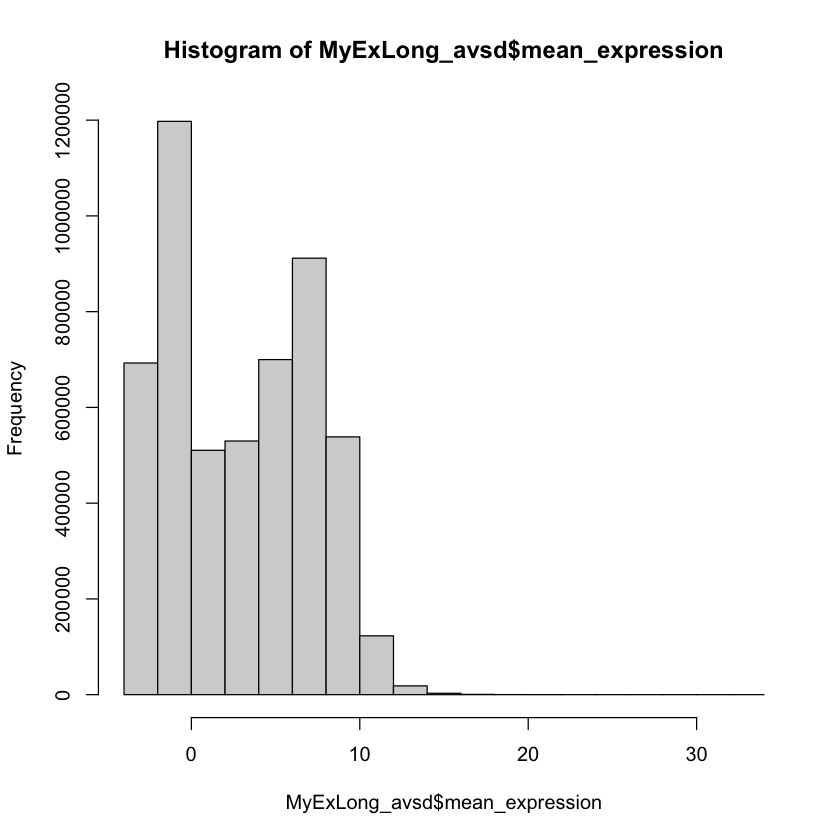

In [19]:
hist(MyExLong_avsd$mean_expression)

### Select expressed transcripts: max(rlog) >0

In [20]:
MyExLong_avsd %>% filter(geneID == 'Soltu.Atl_v3.01_0G000010.1', Tissue == 'Leaf')

geneID,ZT,Tissue,Condition,mean_expression,std,cv
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.54768095,0.81812907,1.49380596
Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.20471250,0.06290640,0.30729144
Soltu.Atl_v3.01_0G000010.1,2,Leaf,LD,0.47728819,0.65409963,1.37045007
Soltu.Atl_v3.01_0G000010.1,2,Leaf,SD,1.19907896,1.07254741,0.89447604
Soltu.Atl_v3.01_0G000010.1,4,Leaf,LD,0.11385838,0.03051797,0.26803445
Soltu.Atl_v3.01_0G000010.1,4,Leaf,SD,2.36303703,0.17203530,0.07280263
Soltu.Atl_v3.01_0G000010.1,6,Leaf,LD,1.13882239,0.98589836,0.86571740
Soltu.Atl_v3.01_0G000010.1,6,Leaf,SD,3.16007380,0.28701615,0.09082577
Soltu.Atl_v3.01_0G000010.1,8,Leaf,LD,0.02952545,0.02392105,0.81018425


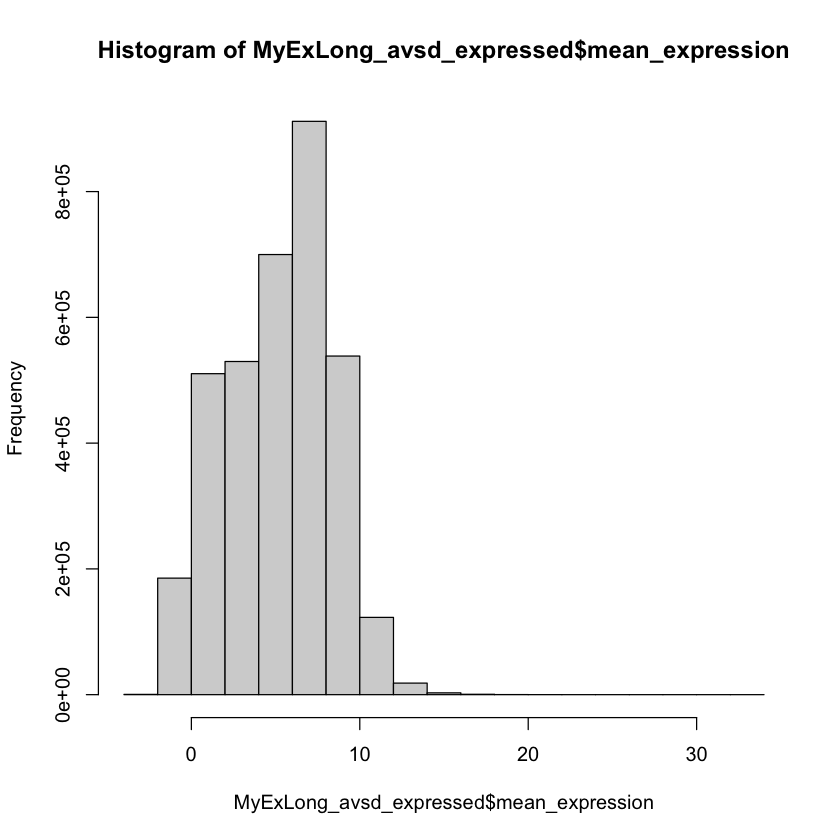

In [21]:

MyExLong_avsd_expressed <- MyExLong_avsd %>% group_by(geneID, Tissue, Condition) %>%
                            filter(max(mean_expression) > 0) %>% ungroup()
 
hist(MyExLong_avsd_expressed$mean_expression)

In [22]:
head(MyExLong_avsd_expressed)


geneID,ZT,Tissue,Condition,mean_expression,std,cv
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.5476810,0.8181291,1.4938060
Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.2047125,0.0629064,0.3072914
Soltu.Atl_v3.01_0G000010.1,0,Tuber,SD,2.1901580,0.3940898,0.1799367
Soltu.Atl_v3.01_0G000010.1,2,Leaf,LD,0.4772882,0.6540996,1.3704501
Soltu.Atl_v3.01_0G000010.1,2,Leaf,SD,1.1990790,1.0725474,0.8944760
Soltu.Atl_v3.01_0G000010.1,2,Tuber,SD,2.1168329,1.4619752,0.6906427


## Calculating average expression of each gene in each condition/tissue

In [23]:
MyExLong_avsd_expressed<- MyExLong_avsd_expressed%>% 
                                        mutate(geneID = as.factor(geneID),
                                               Tissue = as.factor(Tissue),
                                               Condition = as.factor(Condition)) %>%
                                               
                            group_by(geneID, Tissue, Condition) %>%
                        mutate(Average = mean(mean_expression),
                                  SD = sd(mean_expression),
                              CV = mean(cv)) %>% ungroup()
                            
MyExLong_avsd_expressed[1:3,]

geneID,ZT,Tissue,Condition,mean_expression,std,cv,Average,SD,CV
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.5476810,0.8181291,1.4938060,0.7458996,0.4044651,0.8060586
Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.2047125,0.0629064,0.3072914,1.7492942,0.9515069,0.5537575
Soltu.Atl_v3.01_0G000010.1,0,Tuber,SD,2.1901580,0.3940898,0.1799367,2.5845989,0.4560785,0.3425611


### Add target_id column: removing transcript version information

In [24]:
## REMOVE transcript version for versions from .1-.99 

MyExLong_avsd_expressed$target_id<-lapply(MyExLong_avsd_expressed$geneID,
                             function (i){if (str_sub(i,-2,-2) == ".")
                                             { i<- str_sub(i, end = -3)} # i.e. the last character will be -3 position
                                          else if ((str_sub(i,-3,-3) == "."))
                                               { i<- str_sub(i, end = -4)} # i.e. the last character will be -4 position
                                        else {i<-i}
                                          
                                        })
## NOTE MAKES THE COLLUMN A LIST

MyExLong_avsd_expressed$target_id <- as.character(MyExLong_avsd_expressed$target_id)
MyExLong_avsd_expressed[1:2,]

geneID,ZT,Tissue,Condition,mean_expression,std,cv,Average,SD,CV,target_id
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.5476810,0.8181291,1.4938060,0.7458996,0.4044651,0.8060586,Soltu.Atl_v3.01_0G000010
Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.2047125,0.0629064,0.3072914,1.7492942,0.9515069,0.5537575,Soltu.Atl_v3.01_0G000010


### Exporting expressed genes

In [25]:
export(MyExLong_avsd_expressed,
       './Results/ATL_diel_norm_avsd_expressed.csv', sep = ',')

In [26]:
export(MyExLong_avsd_expressed %>% select(geneID, target_id, Tissue, Condition, Average, SD, CV)
                               %>% unique(),
       './Results/ATL_diel_norm_expressed.csv', sep = ',')